In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import seaborn as sns

In [14]:
# assumptions
base_cost = 98
cola = 0.022
years = 6
cost_per_emp = 350000

In [25]:
# ranges
cola_low = 0.025 #0.018
cola_mode = 0.03 #0.022
cola_high = 0.035 #0.03
cost_per_emp_low = 300000
cost_per_emp_mode = 350000
cost_per_emp_high = 425000
assumed_cy_cost = 113
target_cy_cost = 140
gap = target_cy_cost - assumed_cy_cost
sims = 100000

In [20]:
# current year figure
cy_cost = base_cost * ((1 + cola)**years)
print(f"${cy_cost:,.2f}M")

$111.67M


Mean Cost After 6 Years: USD 117.02
5th Percentile: USD 116.08
25th Percentile: USD 116.63
Median (50th): USD 117.01
75th Percentile: USD 117.40
95th Percentile: USD 117.95


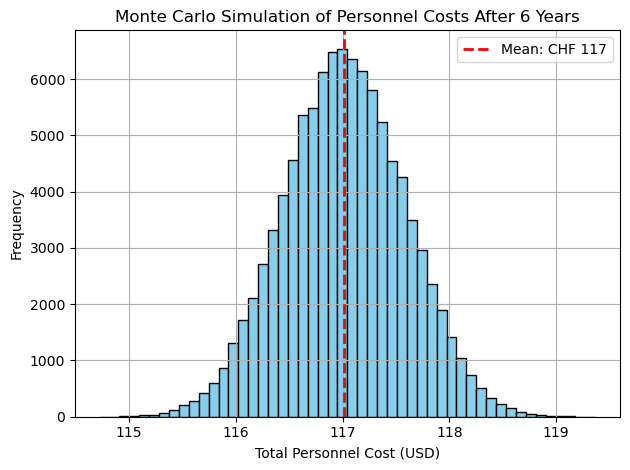

In [26]:
# current year range
import numpy as np
import matplotlib.pyplot as plt

# Run Monte Carlo Simulation
final_costs = []

for _ in range(sims):
    cost = base_cost
    for _ in range(years):
        annual_growth = np.random.triangular(left=cola_low, mode=cola_mode, right=cola_high)
        cost *= (1 + annual_growth)
    final_costs.append(cost)

final_costs = np.array(final_costs)

# Summary Statistics
mean_cost = np.mean(final_costs)
percentiles = np.percentile(final_costs, [5, 25, 50, 75, 95])

# Print Results
print(f"Mean Cost After {years} Years: USD {mean_cost:,.2f}")
print(f"5th Percentile: USD {percentiles[0]:,.2f}")
print(f"25th Percentile: USD {percentiles[1]:,.2f}")
print(f"Median (50th): USD {percentiles[2]:,.2f}")
print(f"75th Percentile: USD {percentiles[3]:,.2f}")
print(f"95th Percentile: USD {percentiles[4]:,.2f}")

# Plotting the distribution
plt.hist(final_costs, bins=50, color='skyblue', edgecolor='black')
plt.title("Monte Carlo Simulation of Personnel Costs After 6 Years")
plt.xlabel("Total Personnel Cost (USD)")
plt.ylabel("Frequency")
plt.axvline(mean_cost, color='red', linestyle='dashed', linewidth=2, label=f"Mean: CHF {mean_cost:,.0f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Estimated Mean New Employees: 0.0
5th Percentile: 0.0
25th Percentile: 0.0
Median (50th): 0.0
75th Percentile: 0.0
95th Percentile: 0.0


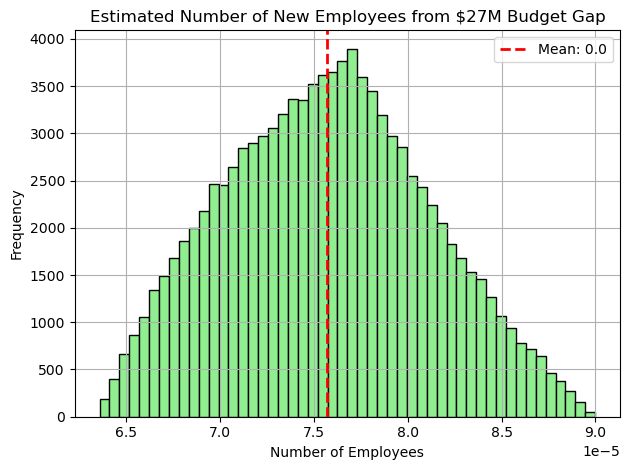

In [23]:
# Monte Carlo Simulation: simulate cost per employee and divide into budget gap
employee_counts = []

for _ in range(sims):
    cost_per_employee = np.random.triangular(left=cost_per_emp_low, mode=cost_per_emp_mode, right=cost_per_emp_high)
    num_employees = gap / cost_per_employee
    employee_counts.append(num_employees)

employee_counts = np.array(employee_counts)

# Summary Statistics
mean_employees = np.mean(employee_counts)
percentiles = np.percentile(employee_counts, [5, 25, 50, 75, 95])

# Print Results
print(f"Estimated Mean New Employees: {mean_employees:.1f}")
print(f"5th Percentile: {percentiles[0]:.1f}")
print(f"25th Percentile: {percentiles[1]:.1f}")
print(f"Median (50th): {percentiles[2]:.1f}")
print(f"75th Percentile: {percentiles[3]:.1f}")
print(f"95th Percentile: {percentiles[4]:.1f}")

# Plotting the distribution
plt.hist(employee_counts, bins=50, color='lightgreen', edgecolor='black')
plt.title("Estimated Number of New Employees from $27M Budget Gap")
plt.xlabel("Number of Employees")
plt.ylabel("Frequency")
plt.axvline(mean_employees, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_employees:.1f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
heads_added = gap / cost_per_emp
heads_added

7.714285714285714e-05